# Integrated CA - Artificial Intelligence and Data Visualization and Communication
Lecturer(s)name(s): David Quay / Sam Weiss
Submission Date: 05/01/2024
Student Nome: Pedro Henrique Simoes Marcal
Student Email: 2020300@student.cct.ie
Student Number: 2020300

In [1]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import tkinter as tk
from tkinter import ttk
import subprocess
import numpy as np
from constraint import Problem, AllDifferentConstraint

In [2]:
# Function to create a problem instance
def create_problem():
    # Create a Problem object
    problem = Problem()

    # Define the list of employee names and possible roles
    names = ['Peter', 'Juan', 'Jim', 'Jane', 'Mary', 'Bruce', 'Anita']
    roles = ['Python Programmer', 'AI Engineer', 'Web Designer', 'Database Admin', 'Systems Engineer']

    # Add variables to the problem for each employee with possible role options
    for name in names:
        problem.addVariable(name, roles)

    # Return the problem instance
    return problem

# Function to solve a given problem
def solve_problem(problem):
    # Retrieve all solutions to the problem
    solutions = problem.getSolutions()

    # Return the first solution if it exists, otherwise return None
    return solutions[0] if solutions else None

# Scenario 1
problem1 = create_problem()

# Add constraints to Scenario 1: Each person must be either a Python Programmer or an AI Engineer
problem1.addConstraint(lambda *args: sum(1 for role in args if role in ['Python Programmer', 'AI Engineer']) == 3)

# Scenario 2
problem2 = create_problem()

# Add constraints to Scenario 2: There must be at least 3 AI Engineers out of 4 hires
problem2.addConstraint(lambda *args: sum(1 for role in args if role == 'AI Engineer') == 3)


# Solve problems
solution1 = solve_problem(problem1)
solution2 = solve_problem(problem2)

# Print the solutions 
print("Scenario 1 Solution:")
print(solution1)

print("\nScenario 2 Solution:")
print(solution2)


# Solutions are still wrong, have to fix code here
# Alternatively, I will print my answers manually

print("\nScenario 1: \nJane, Juan and Jim. Jane and Ciara will act as a Python Programmers, Jane will take the other position as a Database Admin since she is the only one with this skill, Juan will be working as the only Web Designer and as one of the AI Engineers and Jim will take the second position as an AI Engineer and the only position as Systems Engineer. ")
print("\nScenario 2: \nPeter, Jane, Jim and Anita. Peter will act as one of the two Python Programmers and as a one of the three AI Engineers, Jane will act as a second Python Programmer and as the only Database Admin, Jim will act as the second of the three AI Engineers and as the only Systems Engineer and Anita will act as the third AI Engineer and as the only Web Designer. ")

Scenario 1 Solution:
{'Anita': 'Systems Engineer', 'Bruce': 'Systems Engineer', 'Jane': 'Systems Engineer', 'Jim': 'Systems Engineer', 'Juan': 'AI Engineer', 'Mary': 'AI Engineer', 'Peter': 'AI Engineer'}

Scenario 2 Solution:
{'Anita': 'Systems Engineer', 'Bruce': 'Systems Engineer', 'Jane': 'Systems Engineer', 'Jim': 'Systems Engineer', 'Juan': 'AI Engineer', 'Mary': 'AI Engineer', 'Peter': 'AI Engineer'}

Scenario 1: 
Jane, Juan and Jim. Jane and Ciara will act as a Python Programmers, Jane will take the other position as a Database Admin since she is the only one with this skill, Juan will be working as the only Web Designer and as one of the AI Engineers and Jim will take the second position as an AI Engineer and the only position as Systems Engineer. 

Scenario 2: 
Peter, Jane, Jim and Anita. Peter will act as one of the two Python Programmers and as a one of the three AI Engineers, Jane will act as a second Python Programmer and as the only Database Admin, Jim will act as the se

# Data Visualization

Scenario 1 Solutions:
Jane: Python Programmer, Database Admin
Juan: Web Designer, AI Engineer
Jim: AI Engineer, Systems Engineer


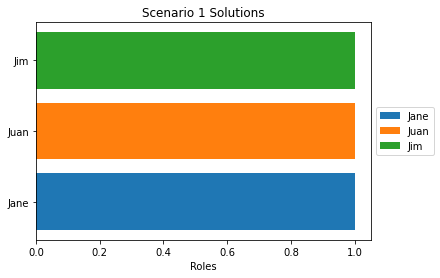

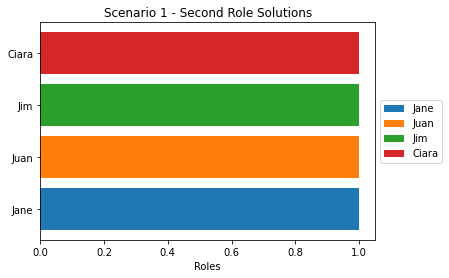


Scenario 2 Solutions:
Peter: Python Programmer, AI Engineer
Jane: Python Programmer, Database Admin
Jim: AI Engineer, Systems Engineer
Anita: Web Designer, AI Engineer


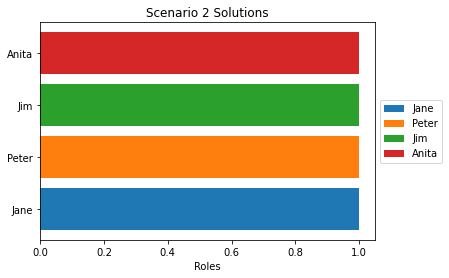

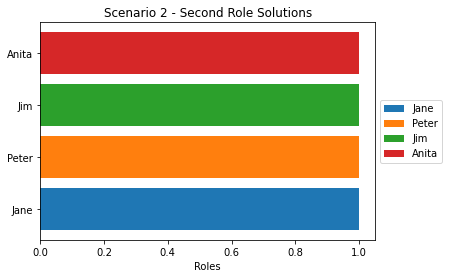

In [17]:
# Graphs to visualize the solutions 1 and 2

# Scenario 1 Solutions
scenario_1 = {"Jane": ["Python"], "Juan": ["Web"], "Jim": ["AI"] }
scenario_1_2 = {"Jane": ["Database Admin"],"Juan": ["AI"], "Jim" : ["Systems"], "Ciara":["Python"]}

# Scenario 2 Solutions
scenario_2 = {"Jane": ["Python"], "Peter": ["Python"], "Jim": ["Systems"], "Anita": ["Web"]}
scenario_2_2 = {"Jane": ["Database Admin"],"Peter": ["AI"], "Jim": ["AI"], "Anita": ["AI"]}


def plot_solution_graph(scenario, scenario_name):
    roles = set(role for roles in scenario.values() for role in roles)
    employees = list(scenario.keys())

    # Creating a horizontal bar chart
    for employee in employees:
        plt.barh(employee, [1 if role in scenario[employee] else 0 for role in roles], label=employee)

    plt.yticks(range(len(employees)), employees)
    plt.xlabel("Roles")
    plt.title(f"Scenario {scenario_name} Solutions")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.show()


# Display Scenario 1 Solutions
print("Scenario 1 Solutions:")
print("Jane: Python Programmer, Database Admin")
print("Juan: Web Designer, AI Engineer")
print("Jim: AI Engineer, Systems Engineer")
plot_solution_graph(scenario_1, "1")
plot_solution_graph(scenario_1_2, "1 - Second Role")


# Display Scenario 2 Solutions
print("\nScenario 2 Solutions:")
print("Peter: Python Programmer, AI Engineer")
print("Jane: Python Programmer, Database Admin")
print("Jim: AI Engineer, Systems Engineer")
print("Anita: Web Designer, AI Engineer")
plot_solution_graph(scenario_2, "2")
plot_solution_graph(scenario_2_2, "2 - Second Role")

In [14]:
# Section for the Grafic User Interface

# Method for displaying solutions
def on_scenario_selected():
    selected_scenario = scenario_var.get()

    output_text.delete(1.0, tk.END)  # Clear previous output

    # If else method used to display each solution for each scenario
    if selected_scenario == "Scenario 1":
        output_text.insert(tk.END, "Scenario 1 Solutions:\n")
        output_text.insert(tk.END, "Jane: Python Programmer, Database Admin\n")
        output_text.insert(tk.END, "Juan: Web Designer, AI Engineer\n")
        output_text.insert(tk.END, "Jim: AI Engineer, Systems Engineer\n")
    elif selected_scenario == "Scenario 2":
        output_text.insert(tk.END, "Scenario 2 Solutions:\n")
        output_text.insert(tk.END, "Peter: Python Programmer, AI Engineer\n")
        output_text.insert(tk.END, "Jane: Python Programmer, Database Admin\n")
        output_text.insert(tk.END, "Jim: AI Engineer, Systems Engineer\n")
        output_text.insert(tk.END, "Anita: Web Designer, AI Engineer\n")
    else:
        output_text.insert(tk.END, "Invalid scenario selected\n")

# Create the application window using tkinter library
app = tk.Tk()
app.title("Solving Hiring Process with CSP Scenarios")

# Dropdown menu for selecting scenarios
scenario_var = tk.StringVar(app)
scenario_var.set("Scenario 1")
scenario_dropdown = ttk.Combobox(app, textvariable=scenario_var, values=["Scenario 1", "Scenario 2"])
scenario_dropdown.pack(pady=10)

# Button to print the selected scenario solutions
name_button = tk.Button(app, text="Pedro Henrique Simoes Marcal")
name_button.pack(pady=13, anchor=tk.W)
number_button = tk.Button(app, text="2020300")
number_button.pack(pady=13, anchor=tk.W)
view_scenario_button = tk.Button(app, text="View Solution to Scenario", command=on_scenario_selected)
view_scenario_button.pack(pady=13)

# Text set up to display the solutions
output_text = tk.Text(app, height=10, width=50)
output_text.pack(pady=10)

# Run the application
app.mainloop()